### Reflections and transmissions of EM waves at a boundary, oblique incidence
This brief simulation helps us develop an intuitive picture for how the amplitude of a wave changes as it is reflected or transmitted from a boundary. Griffiths 9.3.3

Assumptions: no surface charge, no surfance currents, and $\mu_1=\mu_2=\mu_0$

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
%matplotlib inline

In [2]:
# define indices of refraction and compute angles, alpha, beta

n2 = 2
n1 = 1

thetaI = np.arange(0,np.pi/2,0.1)
thetaT = np.arcsin(n1/n2*np.sin(thetaI))

alpha = np.cos(thetaT)/np.cos(thetaI)
beta = n2/n1


# Case 1: p-polarization (polarized "in the plane of incidence") -- Griffiths fig. 9.15

In [3]:
# compute electric field amplitudes (call E_0I = 1)

E_0R = (alpha-beta)/(alpha+beta)
E_0T = 2/(alpha+beta)


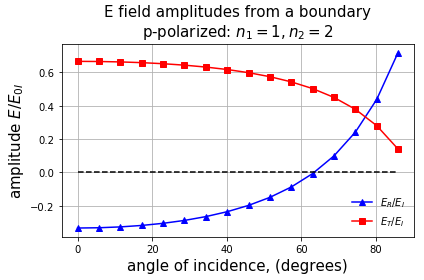

In [4]:
plt.plot(thetaI*180/np.pi,E_0R,'b-^',label = '$E_R/E_I$')    
plt.plot(thetaI*180/np.pi,E_0T,'r-s',label = '$E_T/E_I$')    
# draw horizontal line at zero 
plt.plot(thetaI*180/np.pi,np.zeros(len(thetaI)), 'k--')

plt.xlabel('angle of incidence, (degrees)',fontsize=15)
plt.ylabel('amplitude $E/E_{0I}$',fontsize=15)
plt.title('E field amplitudes from a boundary\np-polarized: $n_1=1,n_2=2$',fontsize=15)
plt.grid(True)

plt.legend(frameon=False,loc='best') 
plt.tight_layout() 

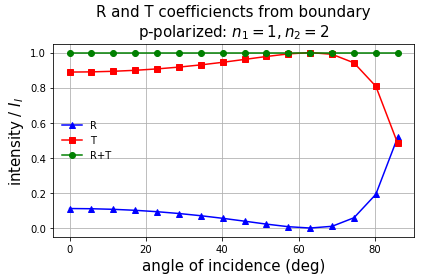

In [5]:
R = np.abs(E_0R)**2
T = alpha*beta*np.abs(E_0T)**2

plt.plot(thetaI*180/np.pi,R,'b-^',label = 'R')    
plt.plot(thetaI*180/np.pi,T,'r-s',label = 'T')    
plt.plot(thetaI*180/np.pi,R+T,'g-o',label = 'R+T')    

plt.xlabel('angle of incidence (deg)',fontsize=15)
plt.ylabel('intensity / $I_I$',fontsize=15)
plt.title('R and T coefficiencts from boundary\np-polarized: $n_1=1,n_2=2$',fontsize=15)
plt.grid(True)

plt.legend(frameon=False,loc='best') 
plt.tight_layout() 

Here's my very simple way to guess what the "magic" angle is (Brewster's angle): just interpolate to figure out where the reflection is really small, and guess again using the graph until you're satisfied:

In [6]:
Rval = np.interp(63.2*np.pi/180,thetaI,R)
print(Rval)

0.0003441483162806204


# Case 2: s-polarization (polarized perpendicular to the "plane of incidence") -- Drawing in notes/slides

Wisdget syntax left here in case one desires to vary some parameters and see how this changes things...

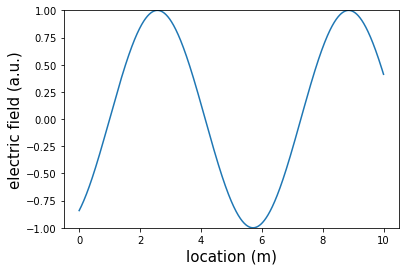

In [10]:
from IPython.html.widgets import interact

def plot_sine(amplitude=1.0, k = 1.0, omega=1.0, t = 1.0):
    plt.ylim(-1.0, 1.0);
    x = np.linspace(0, 10, 1000)
    plt.plot(x, amplitude*np.sin(x*k-omega*t));
    plt.xlabel('location (m)',fontsize=15)
    plt.ylabel('electric field (a.u.)',fontsize=15)

interact(plot_sine, amplitude=(0.0, 1.0),k=(0.0, 5.0),omega=(0.5, 10.0),t=(0.0, 5.0));
